# Introduction

Health insurance is a crucial aspect of healthcare systems worldwide, providing financial protection to individuals and families against the high costs of medical treatments and services. The analysis of health insurance data plays a vital role in understanding various aspects of healthcare utilization, costs, and outcomes.

A health insurance dataset is a collection of structured and organized information related to insurance policies, claims, beneficiaries, providers, and other relevant factors. These datasets contain a wealth of information that can be utilized to gain insights into healthcare trends, make informed decisions, and develop effective strategies for improving healthcare delivery.

Typically, a health insurance dataset includes details such as patient demographics, policy information, claims data, medical procedures and diagnoses, healthcare provider information, prescription drug records, and financial transactions. This comprehensive data enables researchers, policymakers, insurance companies, and healthcare providers to examine patterns, trends, and relationships within the healthcare system.

Analyzing health insurance datasets can provide valuable insights into healthcare utilization patterns, disease prevalence, treatment effectiveness, and healthcare costs. Researchers can explore factors that contribute to high-cost claims, identify patterns of healthcare utilization, and assess the impact of specific interventions or policy changes. These insights can help in improving the efficiency of healthcare delivery, optimizing insurance coverage, and identifying potential areas for cost containment.

Health insurance datasets are also used for risk assessment, fraud detection, and predicting healthcare outcomes. Insurance companies can use historical data to identify high-risk individuals, develop predictive models to estimate healthcare costs, and design appropriate insurance plans. Additionally, these datasets can help in identifying fraudulent activities by detecting patterns that deviate from normal claims behavior.

However, working with health insurance datasets requires careful consideration of privacy and security concerns. Due to the sensitive nature of health-related information, it is essential to handle the data in a manner that protects individual privacy and complies with relevant data protection regulations.

In conclusion, health insurance datasets are invaluable resources for understanding and improving healthcare systems. The analysis of these datasets can provide insights into healthcare utilization, costs, and outcomes, leading to enhanced decision-making, better patient care, and more efficient use of healthcare resources.

# Installing Libraries

In [1]:
pip install pyforest 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=8327c6586b246eb41afad05b176c3268b9ddd8245fc636c0e516b5e790c71515
  Stored in directory: /root/.cache/pip/wheels/9e/7d/2c/5d2f5e62de376c386fd3bf5a8e5bd119ace6a9f48f49df6017
Successfully built pyforest


In [2]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.3 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=2f029b1ff3259633147d3511cb7b9e801bfdd6383ad3ebfe8ca1bb81bf92db23
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11335 sha256=e49bdcf605b061e9040795cad0cf31fcc35256fd9c8361245717331c9230bfb3
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [3]:
!pip install Linearregression 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split
from pyforest import * 

# Importing Dataset

In [6]:
a=pd.read_excel('Health_insurance_cost.xlsx')
a=a

<IPython.core.display.Javascript object>

In [7]:
a.shape

(1338, 7)

In [8]:
a.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520


In [9]:
a.tail()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1333,50.0,male,30.97,3,no,northwest,10600.5483
1334,18.0,female,31.92,0,no,northeast,2205.9808
1335,18.0,female,36.85,0,no,southeast,1629.8335
1336,21.0,female,25.80,0,no,southwest,2007.9450
1337,61.0,female,29.07,0,yes,northwest,29141.3603


In [10]:
a.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1310 non-null   float64
 1   gender                  1338 non-null   object 
 2   BMI                     1315 non-null   float64
 3   Children                1338 non-null   int64  
 4   smoking_status          1338 non-null   object 
 5   location                1338 non-null   object 
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


#### The data consists of 1338 rows of 7 columns. 1 integer type, 3 object type(strings), 3 float type 

In [11]:
a.describe()

,age,BMI,Children,health_insurance_price
count,1310.000000,1315.000000,1338.000000,1336.000000
mean,39.166412,30.638217,1.094918,13268.527719
std,14.055378,6.110302,1.205493,12112.797724
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.210000,0.000000,4744.325050
50%,39.000000,30.305000,1.000000,9382.033000
75%,51.000000,34.580000,2.000000,16604.302645
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
a.columns

Index(['age', 'gender', 'BMI', 'Children', 'smoking_status', 'location',
       'health_insurance_price'],
      dtype='object')

In [13]:
a.dtypes

age                       float64
gender                     object
BMI                       float64
Children                    int64
smoking_status             object
location                   object
health_insurance_price    float64
dtype: object

#### Predicting a health insurance cost is important in todays world because accurate prediction of health insurane costs can help insurance companies, health providers and policymakers better understand the financial risks associated with providing healthcare services.

#### So i will be starting with data preparation that involves missing data analysis through imputation techniques, converting Categorical variables into values, EDA and Machine Learning approach that involves splitting of data into training and testing data, selecting a model to use to get predictions.
#### Here i am using linear regression and knn models to get the predictions.

# Data Analysis approach

## Checking unique values

In [14]:
a.nunique()

age                         47
gender                       2
BMI                        545
Children                     6
smoking_status               2
location                     4
health_insurance_price    1335
dtype: int64

## Checking missing values

In [15]:
a.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

<Axes: >

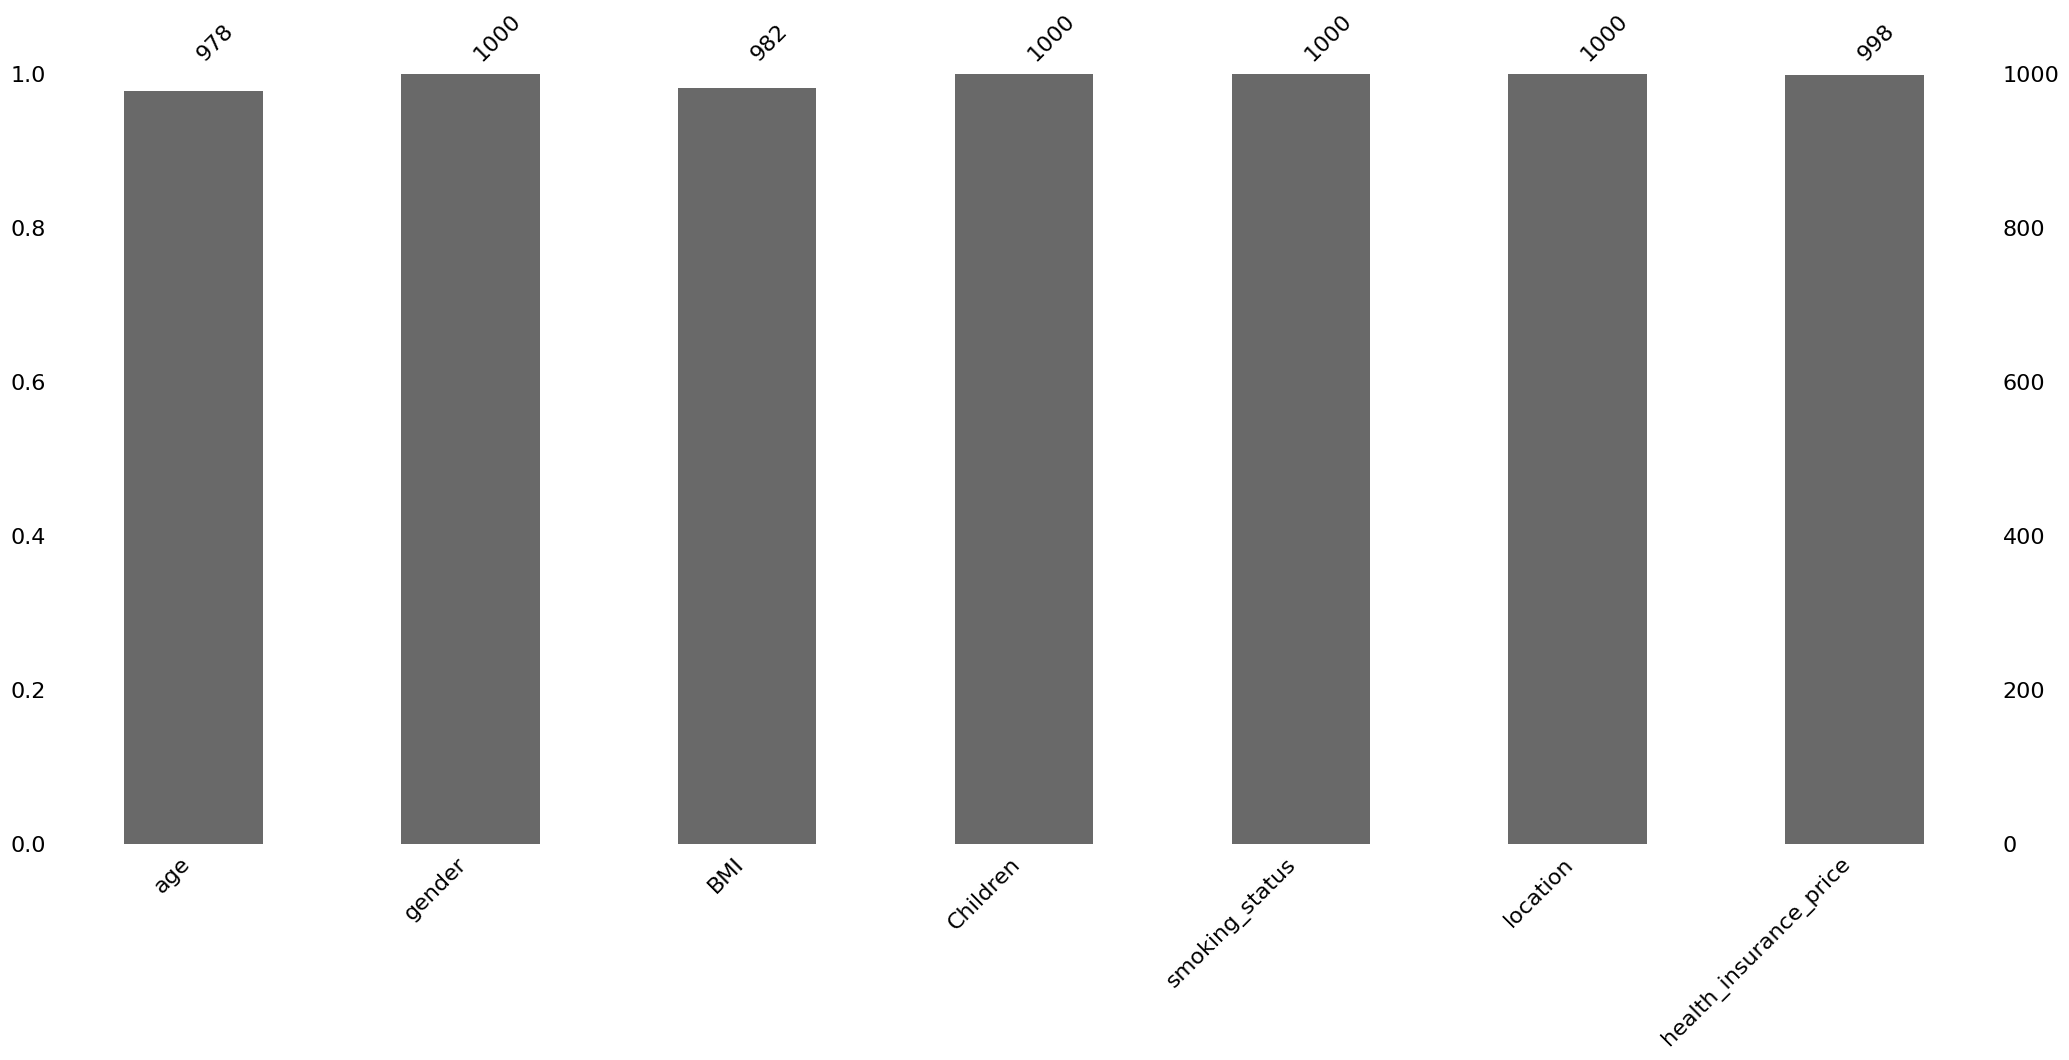

In [16]:
msno.bar(a.sample(1000))

<Axes: >

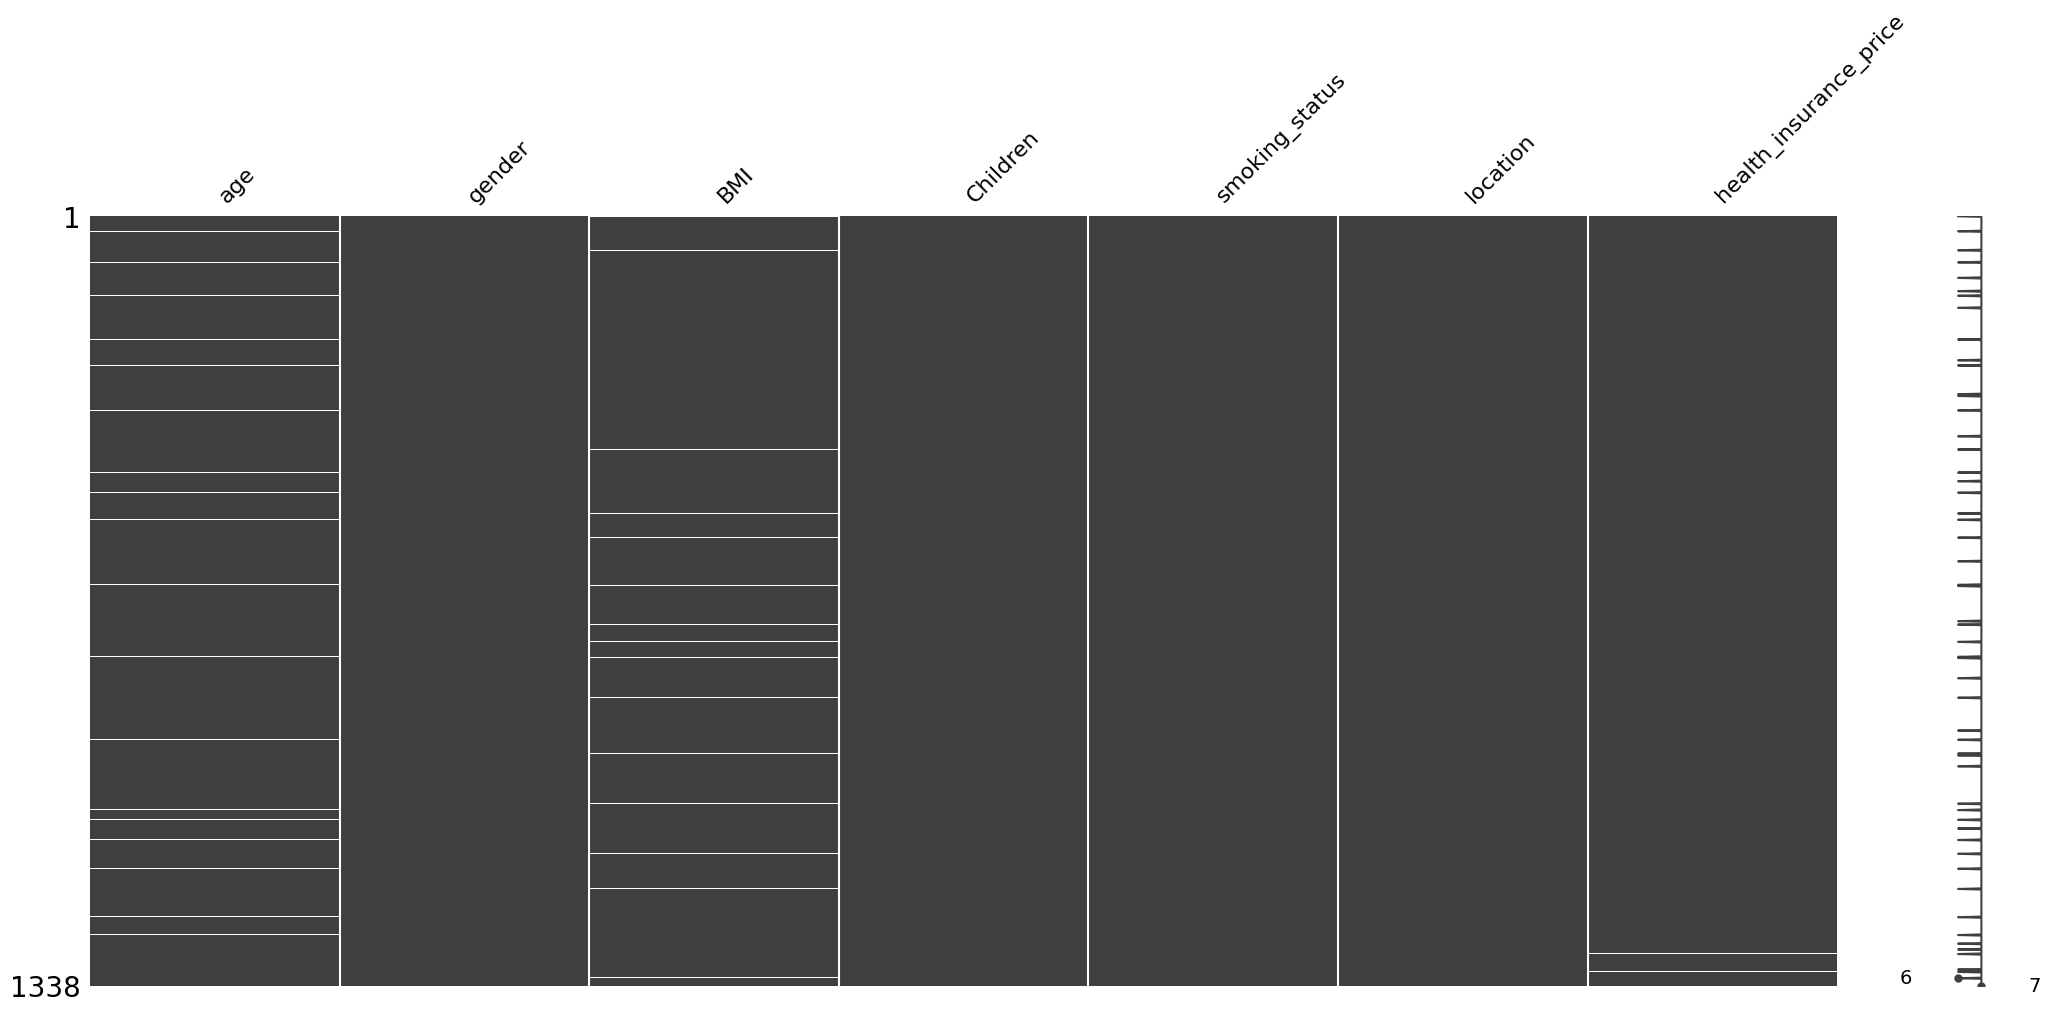

In [17]:
msno.matrix(a)

#### There are some missing values in age, BMI and health insurance price.

<Axes: >

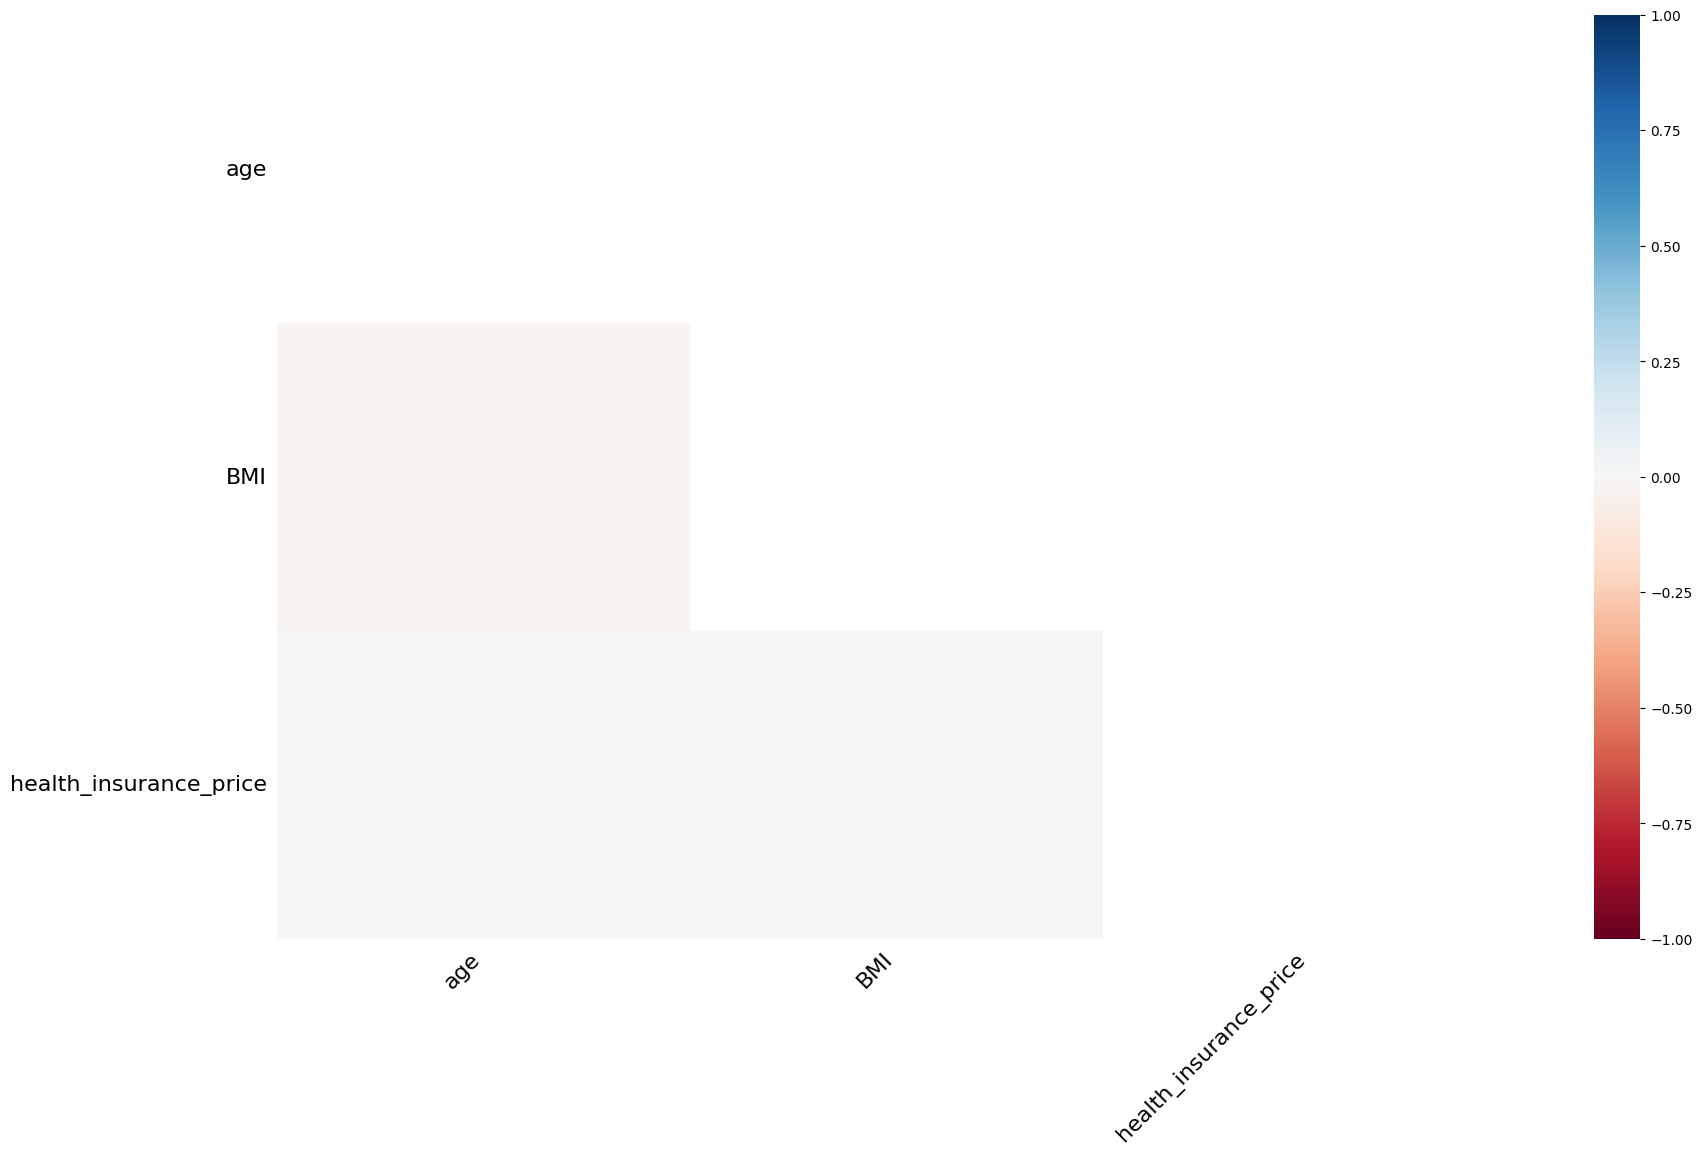

In [18]:
msno.heatmap(a)

#### There is no relationship between any variables

## Drop duplicates

In [19]:
#checking for duplicates and dropping duplicates , if any

a.drop_duplicates()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,female,NaN,0,yes,southwest,16884.92400
1,18.0,male,33.770,1,no,southeast,1725.55230
2,28.0,male,33.000,3,no,southeast,4449.46200
3,33.0,male,22.705,0,no,northwest,21984.47061
4,32.0,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,male,30.970,3,no,northwest,10600.54830
1334,18.0,female,31.920,0,no,northeast,2205.98080
1335,18.0,female,36.850,0,no,southeast,1629.83350
1336,21.0,female,25.800,0,no,southwest,2007.94500


## Transforming columns into numerical values

In [20]:
label = LabelEncoder()
label.fit(a.gender.drop_duplicates())
a.gender = label.transform(a.gender)

label.fit(a.smoking_status.drop_duplicates())
a.smoking_status = label.transform(a.smoking_status)

label.fit(a.location.drop_duplicates())
a.location = label.transform(a.location)


<IPython.core.display.Javascript object>

#### converting the categorical variables into values through encoding is done here

In [21]:
a

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1,10600.54830
1334,18.0,0,31.920,0,0,0,2205.98080
1335,18.0,0,36.850,0,0,2,1629.83350
1336,21.0,0,25.800,0,0,3,2007.94500


In [22]:
a.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     2
dtype: int64

In [23]:
a.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1310.0,39.166412,14.055378,18.0000,26.00000,39.000,51.000000,64.00000
gender,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
BMI,1315.0,30.638217,6.110302,15.9600,26.21000,30.305,34.580000,53.13000
Children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoking_status,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
location,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
health_insurance_price,1336.0,13268.527719,12112.797724,1121.8739,4744.32505,9382.033,16604.302645,63770.42801


# Exploratory Data Analysis & Feauture Engineering

## Dealing with Null values

We have null values in three features Age , BMI and health_insurance_price.

health_insurance_price is our Target Variable , so we can't impute null values. We have to remove it.

In [24]:
#checking for any pattern in records where null values present in health_insurance_price

a[a['health_insurance_price'].isnull()]

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
1281,47.0,0,27.645,2,1,1,NaN
1312,34.0,1,42.900,1,0,3,NaN


In [25]:
#dropping both records

a.dropna(subset=['health_insurance_price'], inplace=True)

In [26]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1308 non-null   float64
 1   gender                  1336 non-null   int64  
 2   BMI                     1313 non-null   float64
 3   Children                1336 non-null   int64  
 4   smoking_status          1336 non-null   int64  
 5   location                1336 non-null   int64  
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 83.5 KB


In [27]:
a


,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,NaN,0,1,3,16884.92400
1,18.0,1,33.770,1,0,2,1725.55230
2,28.0,1,33.000,3,0,2,4449.46200
3,33.0,1,22.705,0,0,1,21984.47061
4,32.0,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1,30.970,3,0,1,10600.54830
1334,18.0,0,31.920,0,0,0,2205.98080
1335,18.0,0,36.850,0,0,2,1629.83350
1336,21.0,0,25.800,0,0,3,2007.94500


In [28]:
a.isnull().sum()

age                       28
gender                     0
BMI                       23
Children                   0
smoking_status             0
location                   0
health_insurance_price     0
dtype: int64

#### Imputation of Null Values

mean imputation

In [29]:
from sklearn.impute import SimpleImputer # importing simple imputer
health_mean = a.copy(deep=True) # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean') # using mean to impute the value
health_mean.iloc[:, :] = mean_imputer.fit_transform(health_mean) #  both fit a model to the data and then transform

<ipython-input-29-f708676e49fd>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  health_mean.iloc[:, :] = mean_imputer.fit_transform(health_mean) #  both fit a model to the data and then transform


median imputation

In [30]:
health_median = a.copy(deep=True) # creating a copy for further evaluation
median_imputer = SimpleImputer(strategy='median') # using median to impute the value
health_median.iloc[:, :] = median_imputer.fit_transform(health_median)

<ipython-input-30-1c83173b6382>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  health_median.iloc[:, :] = median_imputer.fit_transform(health_median)


mode imputation

In [31]:
health_mode = a.copy(deep=True) # creating a copy for further evaluation
mode_imputer = SimpleImputer(strategy='most_frequent') # using most frequent to impute the value
health_mode.iloc[:, :] = mode_imputer.fit_transform(health_mode)

<ipython-input-31-1e18cd382e15>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  health_mode.iloc[:, :] = mode_imputer.fit_transform(health_mode)



KNN Imputation

In [32]:
from fancyimpute import KNN # importing KNN library
knn_imputer = KNN() # calling KNN function
health_knn = a.copy(deep=True) # creating copy
health_knn.iloc[:, :] = knn_imputer.fit_transform(health_knn)

Imputing row 1/1336 with 1 missing, elapsed time: 0.275
Imputing row 101/1336 with 0 missing, elapsed time: 0.276
Imputing row 201/1336 with 0 missing, elapsed time: 0.277
Imputing row 301/1336 with 0 missing, elapsed time: 0.278
Imputing row 401/1336 with 0 missing, elapsed time: 0.279
Imputing row 501/1336 with 0 missing, elapsed time: 0.280
Imputing row 601/1336 with 0 missing, elapsed time: 0.281
Imputing row 701/1336 with 0 missing, elapsed time: 0.282
Imputing row 801/1336 with 0 missing, elapsed time: 0.283
Imputing row 901/1336 with 0 missing, elapsed time: 0.283
Imputing row 1001/1336 with 0 missing, elapsed time: 0.284
Imputing row 1101/1336 with 0 missing, elapsed time: 0.285
Imputing row 1201/1336 with 0 missing, elapsed time: 0.286
Imputing row 1301/1336 with 0 missing, elapsed time: 0.287


<ipython-input-32-25fce07908ec>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  health_knn.iloc[:, :] = knn_imputer.fit_transform(health_knn)


Visualising Imputation

<IPython.core.display.Javascript object>

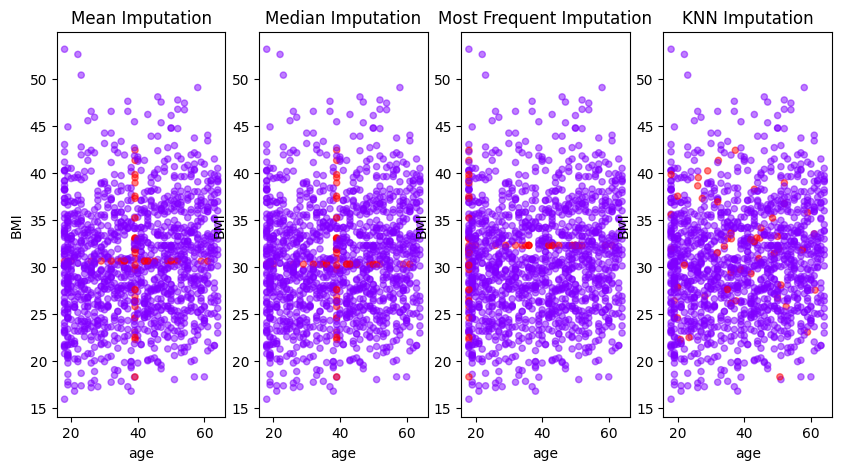

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5)) # creating 2 rows and 3 columns
nullity = a['age'].isnull() + a['BMI'].isnull() # creating null columns between culmen length and culmen depth
imputations = {'Mean Imputation': health_mean, # creating a python dictionary
               'Median Imputation': health_median,
               'Most Frequent Imputation': health_mode,
               'KNN Imputation': health_knn}

for ax, df_key in zip(axes.flatten(), imputations): # a for loop to iterate over the subplots and the imputed data
    imputations[df_key].plot(x='age', y='BMI', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

- we can see here that the distribution of data after KNN imputation have better distribution.
- So , we will use KNN imputation in our dataset.

In [34]:
a = health_knn

In [35]:
a.isna().sum()

age                       0
gender                    0
BMI                       0
Children                  0
smoking_status            0
location                  0
health_insurance_price    0
dtype: int64

In [44]:
a.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1336.0,39.119900,14.050760,18.0000,26.00000,39.000,51.000000,64.00000
gender,1336.0,0.505240,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
BMI,1336.0,30.667334,6.080906,15.9600,26.30875,30.400,34.585000,53.13000
Children,1336.0,1.094311,1.206138,0.0000,0.00000,1.000,2.000000,5.00000
smoking_status,1336.0,0.204341,0.403370,0.0000,0.00000,0.000,0.000000,1.00000
location,1336.0,1.514970,1.104875,0.0000,1.00000,2.000,2.000000,3.00000
health_insurance_price,1336.0,13268.527719,12112.797724,1121.8739,4744.32505,9382.033,16604.302645,63770.42801


#### All the statistics seem reasonable
#### Age column: data looks representative of the true age distribution of the adult population with (39) mean.
#### Children column: Few people have more than 2 children ( 75% of the people have 2 or less children)
#### The claimed amount is highly skewed as most people would require basic medi_care and only few suffer from diseases which cost more to get rid of.

## Dealing with Outliers

In [45]:
fig = px.box(a, y="age", width=400, height=300)
fig.show()

<IPython.core.display.Javascript object>

- Data is normally distributed. Min - 18 & Max - 64

In [46]:
fig = px.box(a, y="BMI", width=400, height=300)
fig.show()

<IPython.core.display.Javascript object>

- There are outliers in BMI Data , But these are not incorrect data as these are possible so we will keep as it is.

In [47]:
fig = px.box(a, y="health_insurance_price", width=400, height=300)
fig.show()

<IPython.core.display.Javascript object>

- There are outliers too , but again these are possible data.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

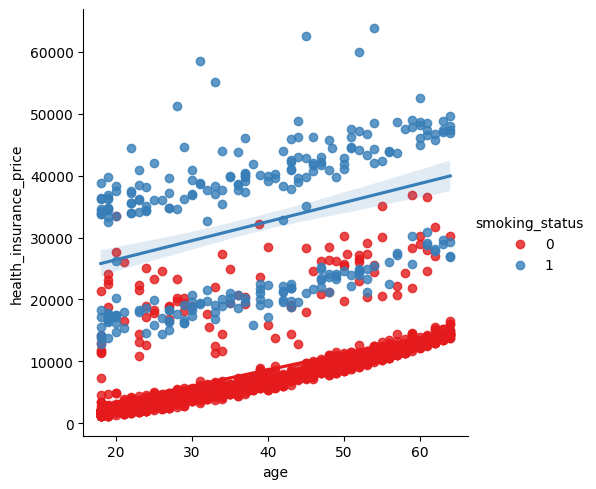

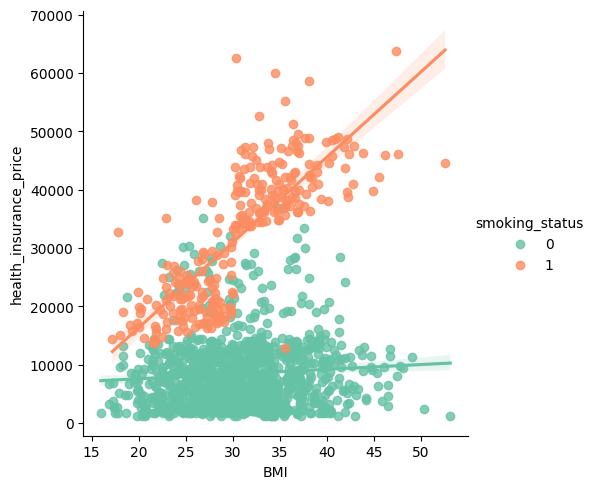

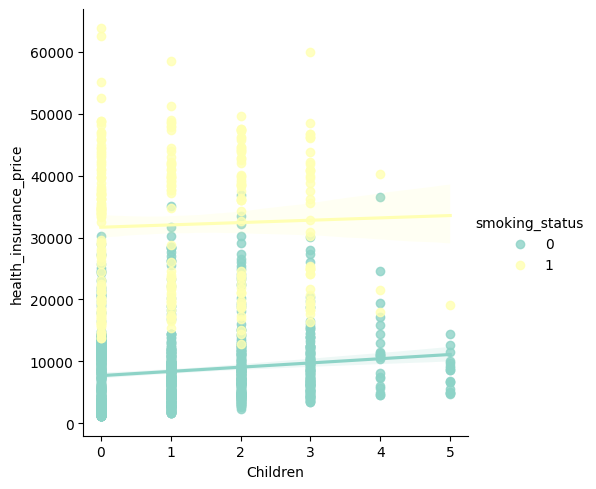

In [48]:
ax = sns.lmplot(x = 'age', y = 'health_insurance_price', data=a, hue='smoking_status', palette='Set1')
ax = sns.lmplot(x = 'BMI', y = 'health_insurance_price', data=a, hue='smoking_status', palette='Set2')
ax = sns.lmplot(x = 'Children', y = 'health_insurance_price', data=a, hue='smoking_status', palette='Set3')

- As we can see , Smoking has serious effect on Health_insurance_price.

### Histogram

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

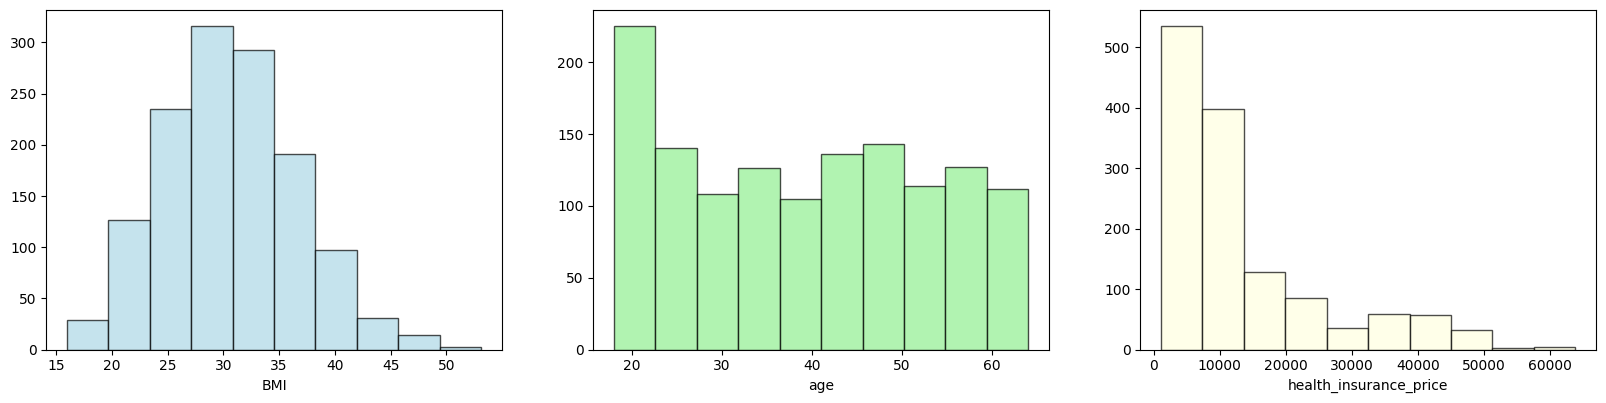

In [50]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(a.BMI, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('BMI')

plt.subplot(3,3,2)
plt.hist(a.age, color='lightgreen', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(a.health_insurance_price, color='lightyellow', edgecolor = 'black', alpha = 0.7)
plt.xlabel('health_insurance_price')

plt.show()

#### BMI looks normally distributed
#### Age looks uniformly distributed.
#### as seen in the previous step, charges are highly skewed to right side.

#### Distplot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-51-8533492b3ecb>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

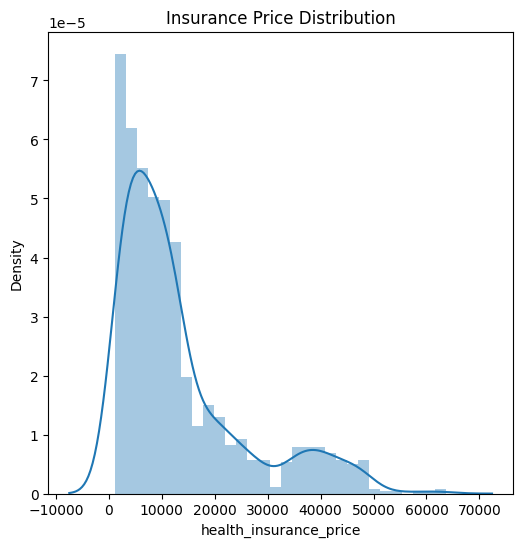

In [51]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(a['health_insurance_price'])
plt.title('Insurance Price Distribution')
plt.show()

- we have a lot of data distributed between 10000 and we have very little values in 30,000 -40,000.

#### Barplot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

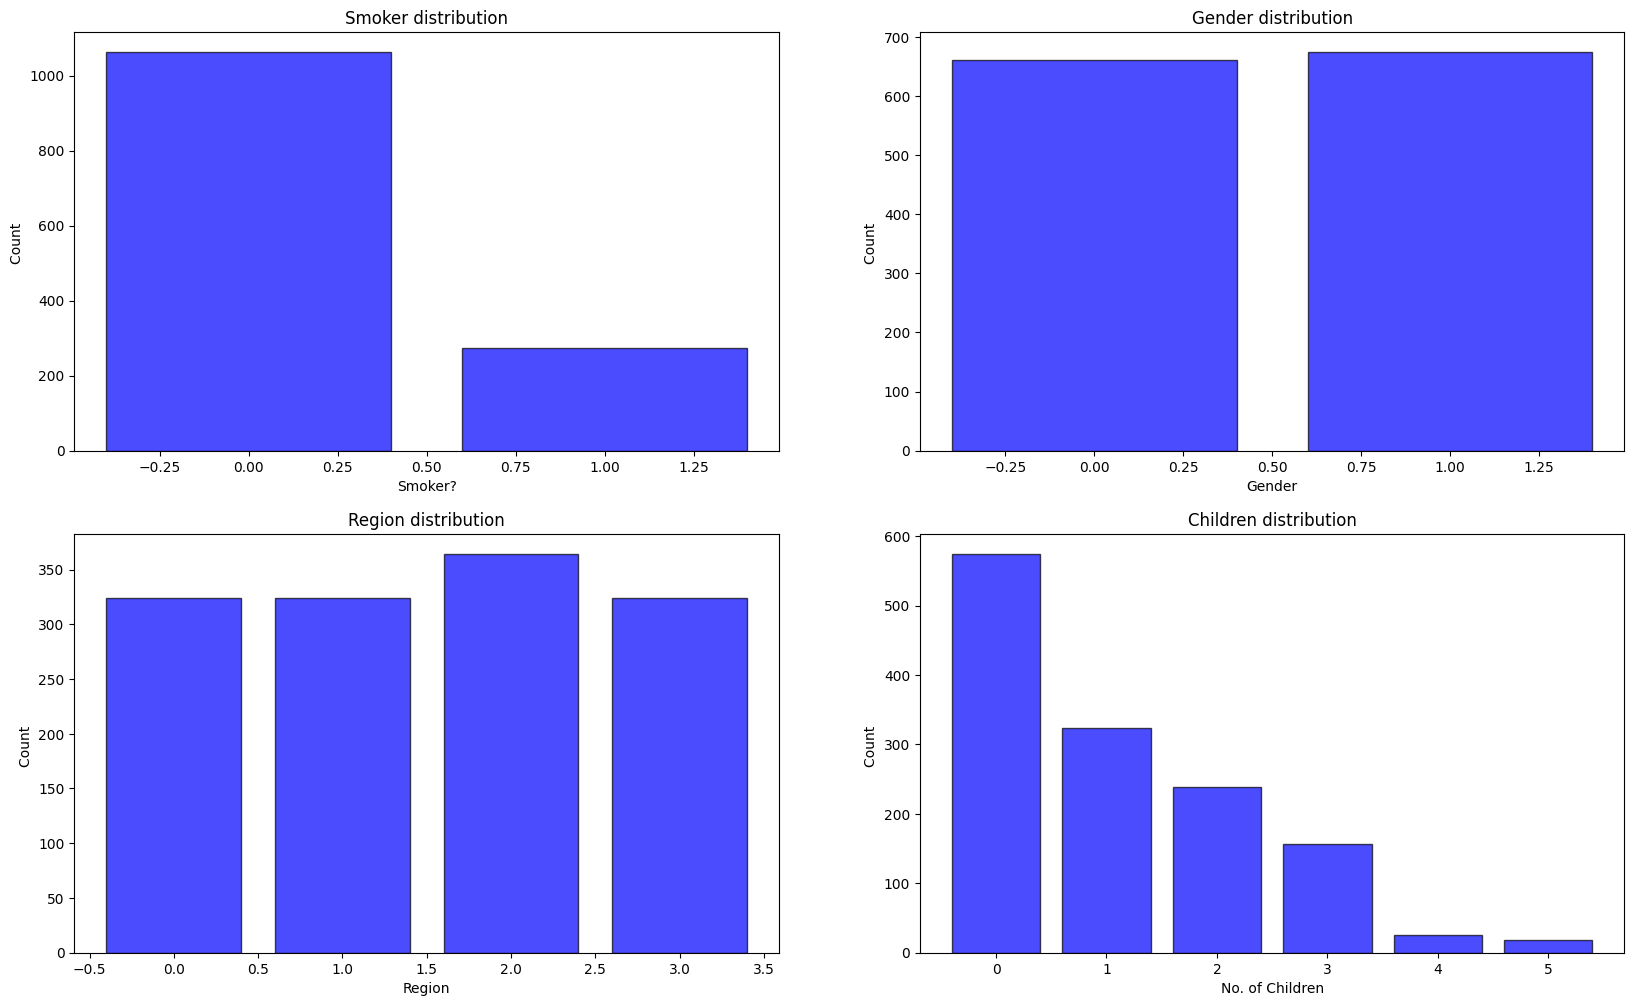

In [52]:
plt.figure(figsize=(20,25))


x = a.smoking_status.value_counts().index 
y = [a['smoking_status'].value_counts()[i] for i in x]  

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Smoker?')
plt.ylabel('Count ')
plt.title('Smoker distribution')



x1 = a.gender.value_counts().index  
y1 = [a['gender'].value_counts()[j] for j in x1] 

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)
plt.xlabel('Gender')
plt.ylabel('Count ')
plt.title('Gender distribution')



x2 = a.location.value_counts().index    
y2 = [a['location'].value_counts()[k] for k in x2] 

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title('Region distribution')




x3 = a.Children.value_counts().index  
y3 = [a['Children'].value_counts()[l] for l in x3]   

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'blue',edgecolor = 'black',alpha = 0.7)  
plt.xlabel('No. of Children')
plt.ylabel('Count ')
plt.title('Children distribution')

plt.show()

#### There are lot more non-smokers than smokers.
#### Instances are distributed evenly across all regions
#### Gender is also distributed evenly
#### Most instances have less than 3 Children and very few have 4 or 5 children.

#### Label Encoding & Pairplot 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

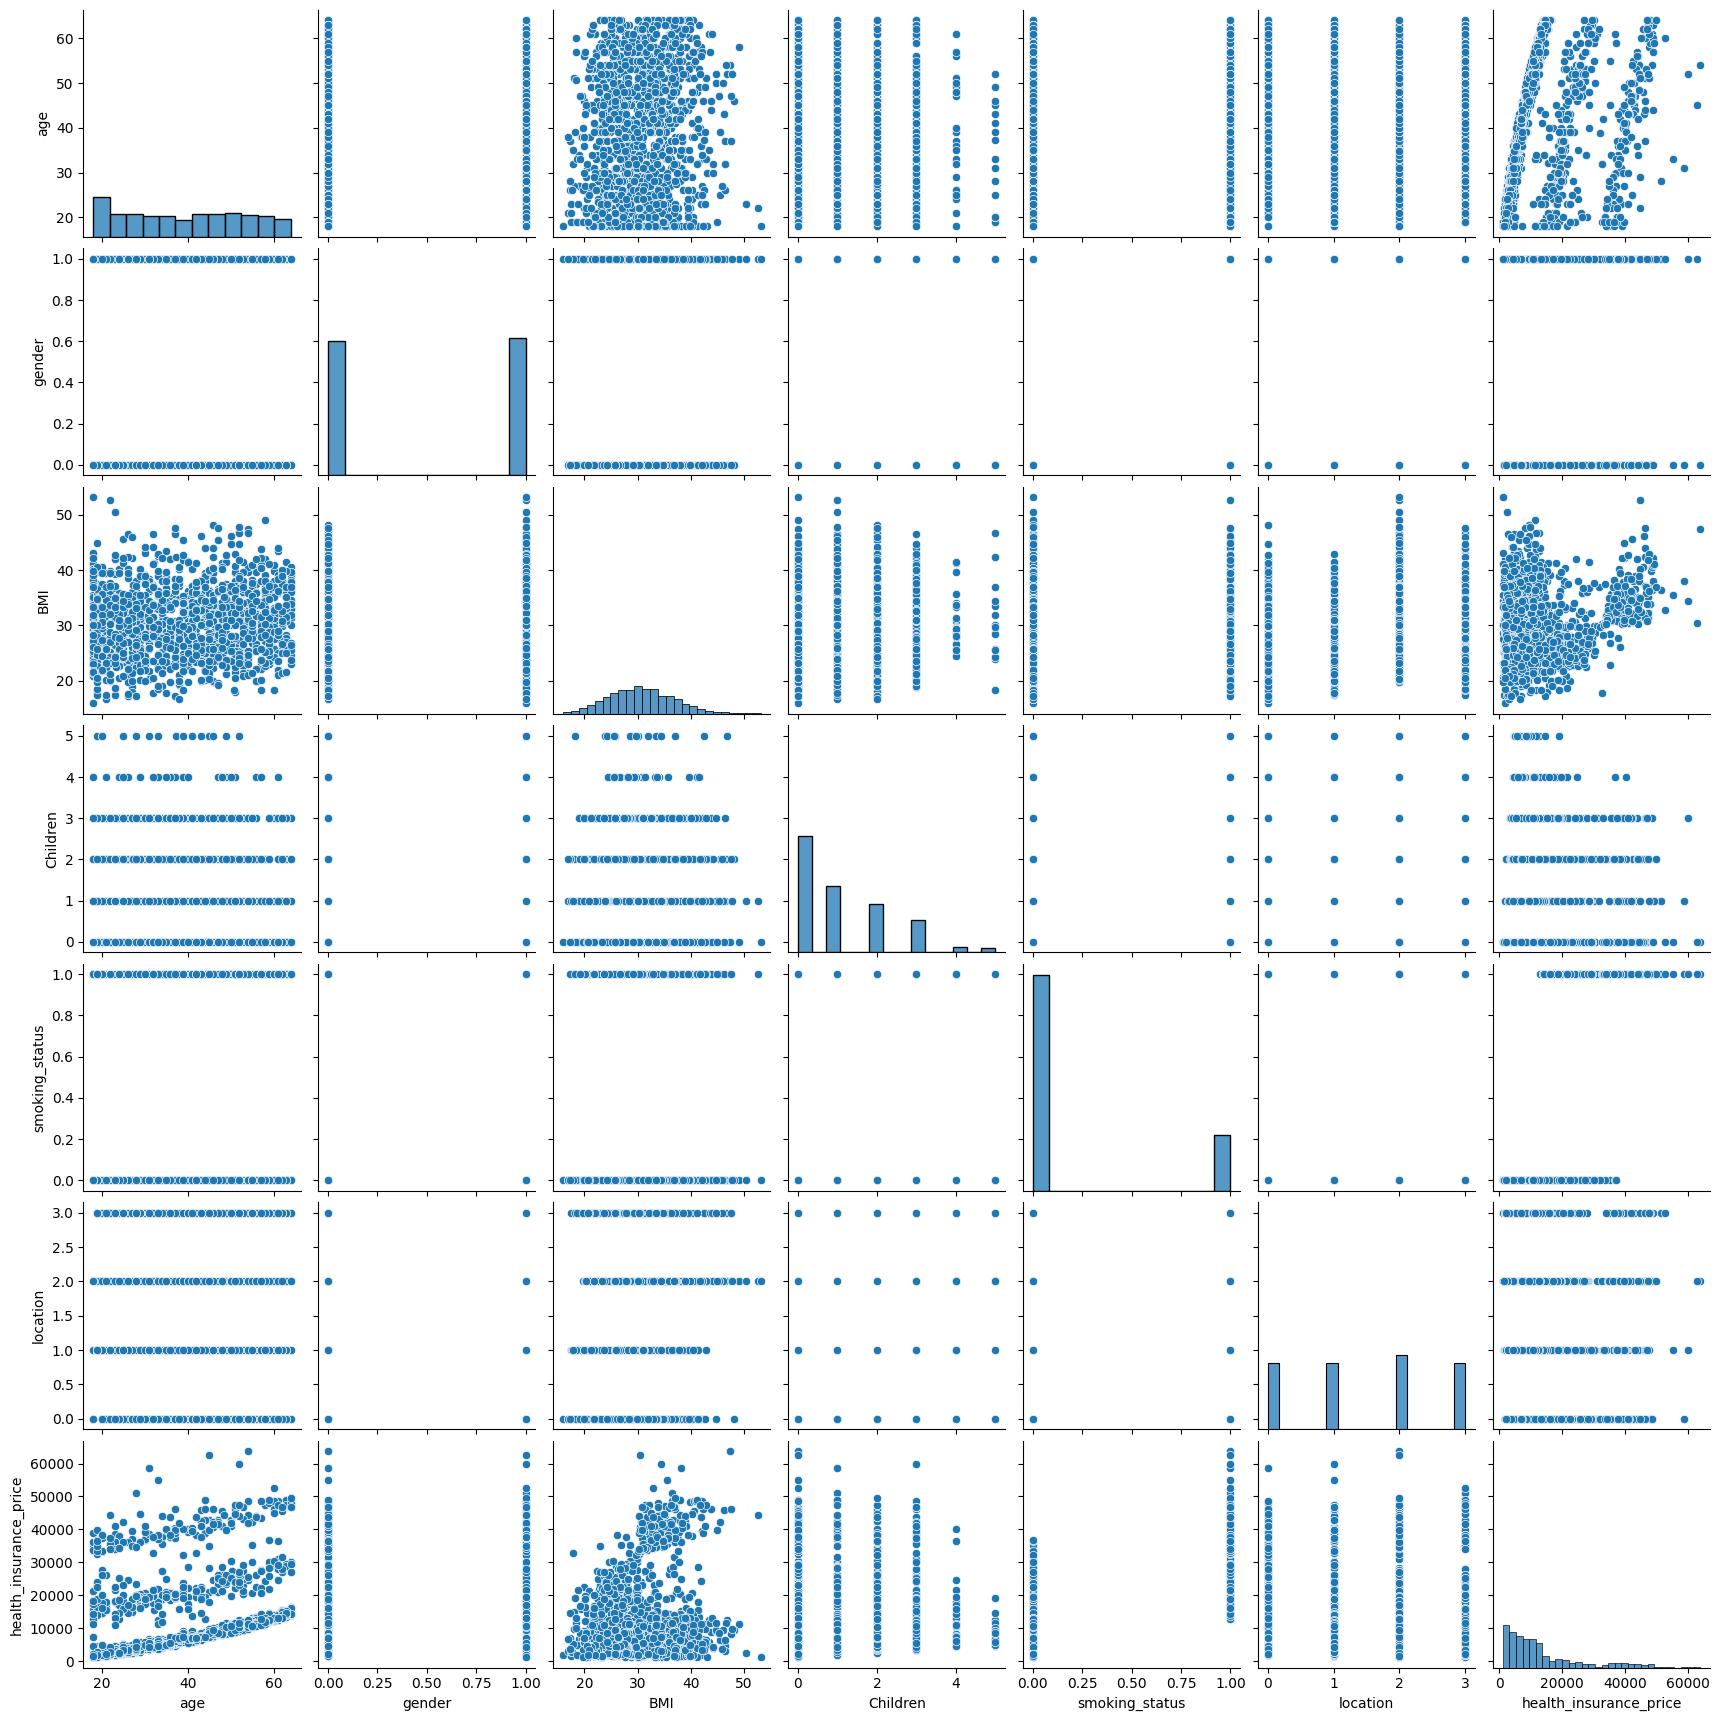

In [54]:
a.loc[:,['gender', 'smoking_status', 'location']] = a.loc[:,['gender', 'smoking_status', 'location']].apply(LabelEncoder().fit_transform) 

sns.pairplot(a)  
plt.show()

#### There is an obvious correlation between 'health insurance price' and 'smoking_status'
#### Looks like smokers claimed more money than non-smokers
#### There is an interesting pattern between 'age' and 'health_insurance_price'. Notice that older people are charged more than the younger ones.

#### Heatmap-Correlation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

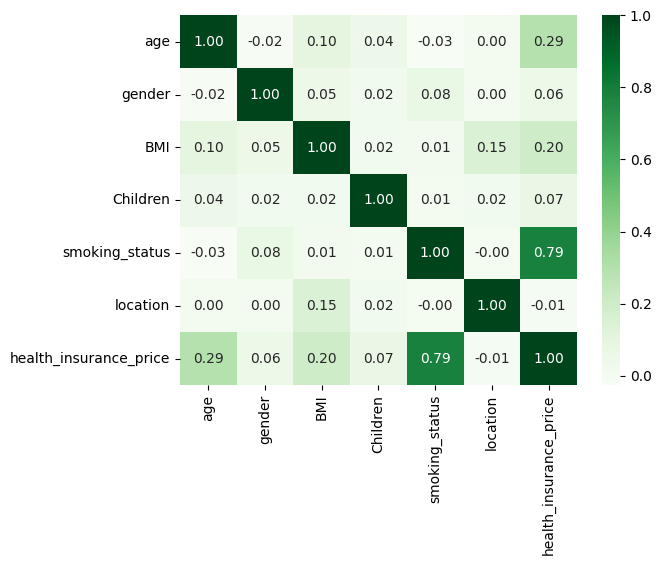

In [55]:
corr_df=a.corr()
plt.figure()
sns.heatmap(data=corr_df,annot=True,cmap='Greens',cbar=True,fmt='.2f')
plt.show()
#data=am,annot=True,cmap='Greens',cbar=True,fmt='.2f'



- smoking status is highly correlated with health insurance price

#### Correlation

In [56]:
a.corr()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
age,1.000000,-0.020125,0.103974,0.041110,-0.025273,0.003526,0.293699
gender,-0.020125,1.000000,0.048041,0.017806,0.078228,0.003247,0.058603
BMI,0.103974,0.048041,1.000000,0.016274,0.009015,0.149537,0.198520
Children,0.041110,0.017806,0.016274,1.000000,0.006548,0.016927,0.067483
smoking_status,-0.025273,0.078228,0.009015,0.006548,1.000000,-0.000986,0.787234
location,0.003526,0.003247,0.149537,0.016927,-0.000986,1.000000,-0.005165
health_insurance_price,0.293699,0.058603,0.198520,0.067483,0.787234,-0.005165,1.000000


In [57]:
a.head()

,age,gender,BMI,Children,smoking_status,location,health_insurance_price
0,19.0,0,26.426491,0.0,1,3,16884.92400
1,18.0,1,33.770000,1.0,0,2,1725.55230
2,28.0,1,33.000000,3.0,0,2,4449.46200
3,33.0,1,22.705000,0.0,0,1,21984.47061
4,32.0,1,28.880000,0.0,0,1,3866.85520


In [38]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1336 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1336 non-null   float64
 1   gender                  1336 non-null   int64  
 2   BMI                     1336 non-null   float64
 3   Children                1336 non-null   float64
 4   smoking_status          1336 non-null   int64  
 5   location                1336 non-null   int64  
 6   health_insurance_price  1336 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 83.5 KB


# Machine Learning Approach

## Splitting Data into x and Y Test and train data

In [79]:
X = a.drop(['health_insurance_price'],axis=1)
Y = a[['health_insurance_price']]

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=42)

<IPython.core.display.Javascript object>

#### Feauture Scaling

In [80]:
from sklearn.preprocessing import StandardScaler # performing standardization technique
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[ 0.50079777,  0.96324195, -0.48574093, -0.88981601, -0.48995209,
         1.36016027],
       [ 0.80945099, -1.03816077,  0.23260581,  1.601136  , -0.48995209,
         0.45756989],
       [ 1.13991033,  0.96324195,  0.02963109, -0.88981601,  2.04101589,
        -1.34761089],
       ...,
       [-1.34552738,  0.96324195, -1.42126225, -0.05949868, -0.48995209,
         1.36016027],
       [-0.13831478, -1.03816077,  2.85540666,  0.77081866,  2.04101589,
         1.36016027],
       [ 1.13991033,  0.96324195, -0.10150895, -0.88981601, -0.48995209,
         1.36016027]])

In [81]:
X_test=sc.transform(X_test)
X_test

array([[-1.48755239, -1.03816077,  1.6292055 , -0.88981601, -0.48995209,
         0.45756989],
       [ 1.42396035,  0.96324195,  1.77621599, -0.05949868,  2.04101589,
         0.45756989],
       [-0.3513523 , -1.03816077, -0.46569404, -0.88981601, -0.48995209,
         0.45756989],
       ...,
       [ 0.99788532,  0.96324195, -0.31868355,  1.601136  , -0.48995209,
         1.36016027],
       [-0.99046485, -1.03816077, -1.62173111, -0.05949868, -0.48995209,
         1.36016027],
       [ 1.56598536, -1.03816077,  0.10898334, -0.88981601, -0.48995209,
        -0.4450205 ]])

In [82]:
X_test
X_train

array([[ 0.50079777,  0.96324195, -0.48574093, -0.88981601, -0.48995209,
         1.36016027],
       [ 0.80945099, -1.03816077,  0.23260581,  1.601136  , -0.48995209,
         0.45756989],
       [ 1.13991033,  0.96324195,  0.02963109, -0.88981601,  2.04101589,
        -1.34761089],
       ...,
       [-1.34552738,  0.96324195, -1.42126225, -0.05949868, -0.48995209,
         1.36016027],
       [-0.13831478, -1.03816077,  2.85540666,  0.77081866,  2.04101589,
         1.36016027],
       [ 1.13991033,  0.96324195, -0.10150895, -0.88981601, -0.48995209,
         1.36016027]])

In [93]:
Y_test

,health_insurance_price
898,1634.57340
1062,48970.24760
1254,4415.15880
298,38746.35510
237,4463.20510
...,...
708,6113.23105
661,22192.43711
1101,11253.42100
1302,3208.78700


In [96]:
Y_test=Y_test.to_numpy()

In [97]:
Y_train=Y_train.to_numpy()

In [102]:
Y_train=Y_train.ravel()
Y_test=Y_test.ravel()

In [101]:
Y_train

array([24603.04837, 27322.73386, 42303.69215, 42112.2356 ,  9748.9106 ,
       12347.172  ,  3490.5491 ,  5272.1758 , 42111.6647 , 19719.6947 ,
        2166.732  , 22478.6    , 13747.87235, 19515.5416 ,  7261.741  ,
        2523.1695 , 11566.30055,  5969.723  ,  4074.4537 ,  6600.20595,
       17626.23951, 32548.3405 , 10264.4421 ,  6067.12675, 49577.6624 ,
        7160.094  ,  5709.1644 , 10072.05505, 11363.2832 ,  2927.0647 ,
       21195.818  ,  2585.85065,  8310.83915, 13635.6379 , 10601.412  ,
       10965.446  ,  2200.83085, 24671.66334,  2534.39375,  9957.7216 ,
        2585.269  , 12094.478  , 12643.3778 , 48173.361  , 35585.576  ,
       35160.13457, 11264.541  ,  9549.5651 ,  1261.442  ,  8444.474  ,
       10807.4863 ,  1628.4709 ,  1977.815  ,  2850.68375, 14358.36437,
       22395.74424,  4837.5823 , 21984.47061, 11881.358  ,  3757.8448 ,
        5227.98875, 45008.9555 , 14449.8544 ,  9391.346  ,  5245.2269 ,
       21659.9301 ,  2464.6188 ,  1769.53165,  3972.9247 , 34838

In [103]:
Y_test

array([ 1634.5734  , 48970.2476  ,  4415.1588  , 38746.3551  ,
        4463.2051  ,  9304.7019  , 38511.6283  ,  2150.469   ,
        7345.7266  ,  5375.038   , 13415.0381  , 24393.6224  ,
        6059.173   , 44202.6536  ,  2709.1119  ,  8027.968   ,
        1980.07    , 38709.176   ,  5261.46945 ,  3947.4131  ,
        6753.038   ,  4529.477   , 12430.95335 , 21082.16    ,
        3597.596   ,  3579.8287  , 48673.5588  , 19040.876   ,
        9778.3472  , 10736.87075 ,  4347.02335 , 10594.50155 ,
        4518.82625 , 12333.828   , 63770.42801 , 36307.7983  ,
        4687.797   , 36124.5737  ,  8534.6718  ,  8233.0975  ,
        2755.02095 , 13555.0049  , 42124.5153  ,  4571.41305 ,
        9193.8385  ,  1704.70015 ,  8782.469   , 10848.1343  ,
        4133.64165 ,  7954.517   ,  4349.462   ,  7045.499   ,
       37465.34375 ,  1391.5287  , 12982.8747  ,  7731.4271  ,
       34472.841   ,  7325.0482  ,  9222.4026  ,  7256.7231  ,
       10977.2063  ,  7448.40395 , 11187.6567  ,  1629.

## importing Models

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#### Model Training

In [104]:
lr = LinearRegression()
lr.fit(X_train , Y_train)
svm = SVR()
svm.fit(X_train , Y_train)
rf = RandomForestRegressor()
rf.fit(X_train , Y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train , Y_train)

GradientBoostingRegressor()

# Predictions

#### Predicting the testing data to find how accurate our predictions are

In [106]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'actual' : Y_test, 'Lr' : y_pred1,
                  'svm' : y_pred2 , 'rf' : y_pred3 , 'gr' : y_pred4})

<IPython.core.display.Javascript object>

#### Comparing Performance Visually

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

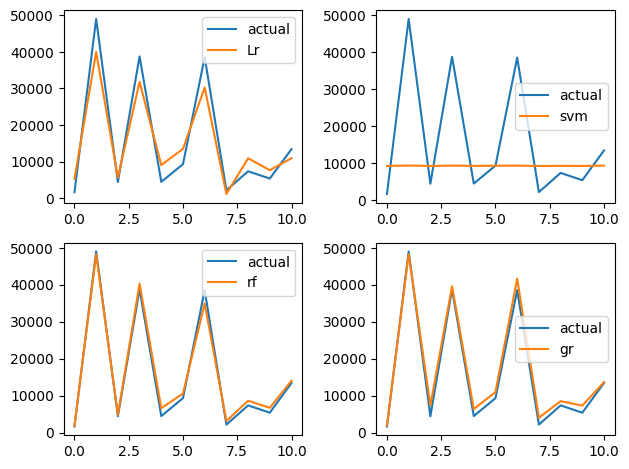

In [107]:
plt.subplot(221)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['Lr'].iloc[0:11] , label = 'Lr')
plt.legend()

plt.subplot(222)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['svm'].iloc[0:11] , label = 'svm')
plt.legend()

plt.subplot(223)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['rf'].iloc[0:11] , label = 'rf')
plt.legend()

plt.subplot(224)
plt.plot(df1['actual'].iloc[0 : 11],label = 'actual')
plt.plot(df1['gr'].iloc[0:11] , label = 'gr')

plt.tight_layout()
plt.legend()

#### Evaluating the Algorithm

In [108]:
#evaluating using metrics
from sklearn import metrics

In [110]:
r2m1 = metrics.r2_score(Y_test , y_pred1)
r2m2 = metrics.r2_score(Y_test , y_pred2)
r2m3 = metrics.r2_score(Y_test , y_pred3)
r2m4 = metrics.r2_score(Y_test , y_pred4)

In [111]:
print(r2m1,r2m2,r2m3,r2m4)

0.7849517665602412 -0.13373104841952377 0.8800233030387168 0.8897105646356187


In [112]:
n= 1336   #number of observations
k=6  #number of independent variables
adj_r2_scorem1 = 1 - ((1-r2m1)*(n-1)/(n-k-1))
print(adj_r2_scorem1)

adj_r2_scorem2 = 1 - ((1-r2m2)*(n-1)/(n-k-1))
print(adj_r2_scorem2)

adj_r2_scorem3 = 1 - ((1-r2m3)*(n-1)/(n-k-1))
print(adj_r2_scorem3)

adj_r2_scorem4 = 1 - ((1-r2m4)*(n-1)/(n-k-1))
print(adj_r2_scorem4)

0.7839808941745087
-0.1388494730173544
0.8794816475219616
0.8892126439341994


In [114]:
#evaluating using Mean Absolute Error
s1 = metrics.mean_absolute_error(Y_test , y_pred1)
s2 = metrics.mean_absolute_error(Y_test , y_pred2)
s3 = metrics.mean_absolute_error(Y_test , y_pred3)
s4 = metrics.mean_absolute_error(Y_test , y_pred4)

In [115]:
print(s1,s2,s3,s4)

4261.105956335892 8912.264388759882 2636.7361815536165 2556.2342134937926


#### Conclusion
- Gradient Boosting Algorithm is giving best results.
- So , we will use Gradient Boosting Algorithm for Model Deployment.